## MOwNiT Laboratorium 3 Mnożenie macierzy  
### Zadanie 1
Przetestować funkcje:
- naive_multiplication(A,B),
- better_multiplication(A,B)
- mnożenie BLAS w Julii (A*B)

Uruchomić dla coraz większych macierzy i zmierzyć czasy. Narysować wykres zależyności czasu od rozmiaru macierzy wraz z słupkami błędów, tak jak na poprzednim laboratorium. Wszystkie trzy metody powinny być na jednym wykresie.

In [2]:
using Plots
using DataFrames

ArgumentError: ArgumentError: Package Roots not found in current path:
- Run `import Pkg; Pkg.add("Roots")` to install the Roots package.


In [2]:
# mnożenie macierzy - wersja naiwna
function naive_multiplication(A,B)
    C=zeros(Float64,size(A,1),size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j]=C[i,j]+A[i,k]*B[k,j]
            end
        end
    end
    C
end

naive_multiplication (generic function with 1 method)

In [3]:
# poprawiona funkcja korzytająca z powyższego oraz z faktu, że
#można zmieniać kolejność operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication( A,B )
    C=zeros(Float64,size(A,1),size(B,2))
    for j=1:size(A,1)
        for k=1:size(B,2)
            for i=1:size(A,2)
                C[i,j]=C[i,j]+A[i,k]*B[k,j]
            end
        end
    end
    C
end

better_multiplication (generic function with 1 method)

In [4]:
dfJulia=DataFrame(Method=String[],Size=Int64[],Time=Float64[])

A=rand(2,2)

naive_multiplication(A,A)
better_multiplication(A,A)
A*A

for i=collect(10:10:500)
    for j=1:10
        A=rand(i,i)
        B=rand(i,i)

        push!(dfJulia,["naive", i, (@elapsed naive_multiplication(A,B))])
        push!(dfJulia,["better", i, (@elapsed better_multiplication(A,B))])
        push!(dfJulia,["blas", i, (@elapsed A*B)])
    end
end
dfJulia

,Method,Size,Time
,String,Int64,Float64
1,naive,10,5.075e-6
2,better,10,5.131e-6
3,blas,10,0.000942753
4,naive,10,3.623e-6
5,better,10,2.146e-6
6,blas,10,1.78e-6
7,naive,10,2.274e-6
8,better,10,1.9e-6
9,blas,10,6.81e-7


In [5]:
dfDataJulia=by(dfJulia,:Method) do part1
    by(part1,:Size) do part2
        DataFrame(
            Mean=mean(part2[:Time]),
            Std=std(part2[:Time])
        )
    end
end

,Method,Size,Mean,Std
,String,Int64,Float64,Float64
1,naive,10,2.6595e-6,9.54404e-7
2,naive,20,1.98255e-5,2.12076e-7
3,naive,30,7.17807e-5,2.59293e-7
4,naive,40,0.000178381,1.37993e-6
5,naive,50,0.000367458,1.62764e-5
6,naive,60,0.000604745,1.23315e-5
7,naive,70,0.00117112,5.16138e-5
8,naive,80,0.00186448,0.000179186
9,naive,90,0.00253464,2.53177e-5


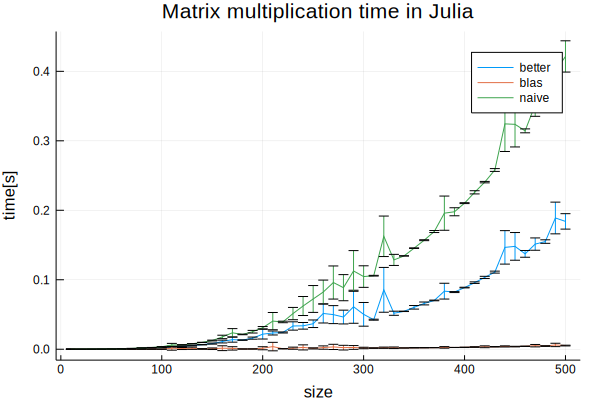

In [6]:
plot(dfDataJulia[:Size],dfDataJulia[:Mean], group=dfDataJulia[:Method],yerr=dfDataJulia[:Std],
    xlabel="size",ylabel="time[s]",title="Matrix multiplication time in Julia")

### Zadanie 2

Napisać w języku C:
- naiwną metodę mnożenia macierzy (wersja 1) 
- ulepszoną za pomocą zamiany pętli metodę mnożenia macierzy (wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
- skorzystać z  możliwości BLAS dostępnego w GSL(wersja 3). 

Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1.(osobno niż p.1). (Dla chętnych) sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu.

In [7]:
dfC=CSV.read("data.csv")

,Method,Size,Time
,String⍰,Int64⍰,Float64⍰
1,naive,10,6.3e-5
2,naive,10,5.6e-5
3,naive,10,4.5e-5
4,naive,10,5.9e-5
5,naive,10,4.9e-5
6,naive,10,4.8e-5
7,naive,10,4.1e-5
8,naive,10,4.7e-5
9,naive,10,4.8e-5


In [8]:
dfDataC=by(dfC,:Method) do part1
    by(part1,:Size) do part2
        DataFrame(
            Mean=mean(part2[:Time]),
            Std=std(part2[:Time])
        )
    end
end

,Method,Size,Mean,Std
,String⍰,Int64⍰,Float64,Float64
1,naive,10,5.06667e-5,7.1239e-6
2,naive,20,0.000343,6.66933e-5
3,naive,30,0.000992556,0.000200618
4,naive,40,0.000976111,0.000270533
5,naive,50,0.000751667,0.000190383
6,naive,60,0.00112522,0.000164535
7,naive,70,0.001963,0.00100813
8,naive,80,0.00239867,7.71735e-5
9,naive,90,0.00344378,0.000327714


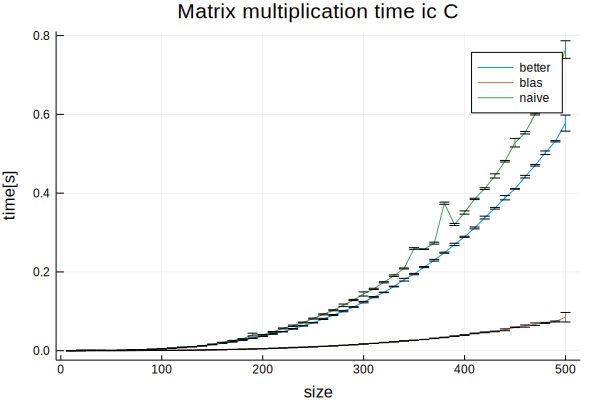

In [9]:
plot(dfDataC[:Size],dfDataC[:Mean], group=dfDataC[:Method],yerr=dfDataC[:Std],
    xlabel="size",ylabel="time[s]",title="Matrix multiplication time ic C")

### Zadanie 3
Użyć funkcji polyfit z pakietu Polynomials do znalezienia odpowiednich wielomianow, ktore najlepiej pasują do zależności czasowych kazdego z algorytmow. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianow do wczesniejszych wykresów.

In [10]:
using Polynomials

In [11]:
dfPolyJulia=by(dfDataJulia,:Method) do part1
    poly=polyfit(part1[:Size],part1[:Mean],3)
    DataFrame(Size=part1[:Size],PolyVal=polyval(poly,part1[:Size]))
end

,Method,Size,PolyVal
,String,Int64,Float64
1,naive,10,-0.00343439
2,naive,20,-0.00282764
3,naive,30,-0.00215369
4,naive,40,-0.00139579
5,naive,50,-0.000537159
6,naive,60,0.000438966
7,naive,70,0.00154935
8,naive,80,0.00281076
9,naive,90,0.00423996


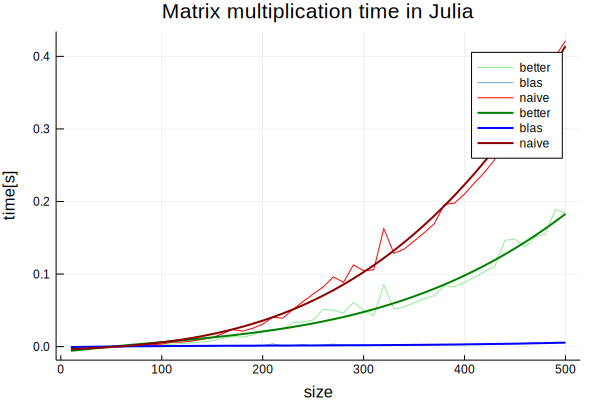

In [12]:
plot(dfDataJulia[:Size],dfDataJulia[:Mean], group=dfDataJulia[:Method],
    xlabel="size",ylabel="time[s]",color = [:lightgreen :skyblue3 :red])
plot!(dfPolyJulia[:Size],dfPolyJulia[:PolyVal], group=dfPolyJulia[:Method],
    xlabel="size",ylabel="time[s]",color = [:green :blue :darkred],lw=2,title="Matrix multiplication time in Julia")

In [13]:
dfPolyC=by(dfDataC,:Method) do part1
    poly=polyfit(part1[:Size],part1[:Mean],3)
    DataFrame(Size=part1[:Size],PolyVal=polyval(poly,part1[:Size]))
end




,Method,Size,PolyVal
,String⍰,Int64⍰,Float64
1,naive,10,-0.00258253
2,naive,20,-0.00152123
3,naive,30,-0.000578425
4,naive,40,0.000290835
5,naive,50,0.00113152
6,naive,60,0.00198859
7,naive,70,0.00290701
8,naive,80,0.00393176
9,naive,90,0.00510778


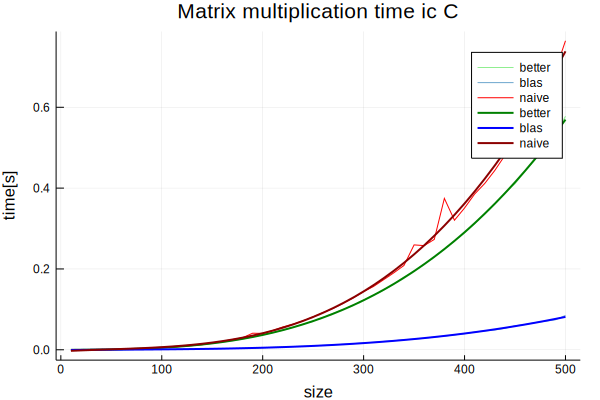

In [14]:
plot(dfDataC[:Size],dfDataC[:Mean], group=dfDataC[:Method],
    xlabel="size",ylabel="time[s]",color = [:lightgreen :skyblue3 :red])
plot!(dfPolyC[:Size],dfPolyC[:PolyVal], group=dfPolyC[:Method],
    xlabel="size",ylabel="time[s]",color = [:green :blue :darkred],lw=2,title="Matrix multiplication time ic C")

### Zadanie 4
Przedstawić wyniki dla języka Julia i C na wspólnym wykresie. Jaka metoda jest najszybsza?

In [15]:
DataFrame(Method=map(x->string("Julia ",x),dfDataJulia[:Method]),Size=dfDataJulia[:Size],Mean=dfDataJulia[:Mean])

,Method,Size,Mean
,String,Int64,Float64
1,Julia naive,10,2.6595e-6
2,Julia naive,20,1.98255e-5
3,Julia naive,30,7.17807e-5
4,Julia naive,40,0.000178381
5,Julia naive,50,0.000367458
6,Julia naive,60,0.000604745
7,Julia naive,70,0.00117112
8,Julia naive,80,0.00186448
9,Julia naive,90,0.00253464


In [16]:
dfData=append!(
    DataFrame(Method=map(x->string("Julia ",x),dfDataJulia[:Method]),Size=dfDataJulia[:Size],Mean=dfDataJulia[:Mean]),
    DataFrame(Method=map(x->string("C ",x),dfDataC[:Method]),Size=dfDataC[:Size],Mean=dfDataC[:Mean])
)

,Method,Size,Mean
,String,Int64,Float64
1,Julia naive,10,2.6595e-6
2,Julia naive,20,1.98255e-5
3,Julia naive,30,7.17807e-5
4,Julia naive,40,0.000178381
5,Julia naive,50,0.000367458
6,Julia naive,60,0.000604745
7,Julia naive,70,0.00117112
8,Julia naive,80,0.00186448
9,Julia naive,90,0.00253464


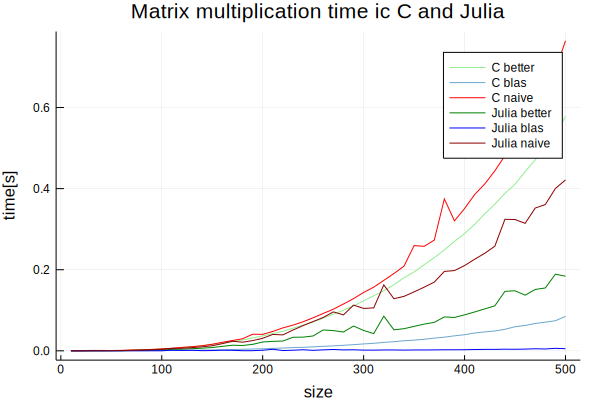

In [17]:
plot(dfData[:Size],dfData[:Mean], group=dfData[:Method],#yerr=dfData[:Std],
    xlabel="size",ylabel="time[s]",color = [:lightgreen :skyblue3 :red :green :blue :darkred],title="Matrix multiplication time ic C and Julia")

In [18]:
dfPoly=by(dfData,:Method) do part1
    poly=polyfit(part1[:Size],part1[:Mean],3)
    DataFrame(Size=part1[:Size],PolyVal=polyval(poly,part1[:Size]))
end

,Method,Size,PolyVal
,String,Int64,Float64
1,Julia naive,10,-0.00343439
2,Julia naive,20,-0.00282764
3,Julia naive,30,-0.00215369
4,Julia naive,40,-0.00139579
5,Julia naive,50,-0.000537159
6,Julia naive,60,0.000438966
7,Julia naive,70,0.00154935
8,Julia naive,80,0.00281076
9,Julia naive,90,0.00423996


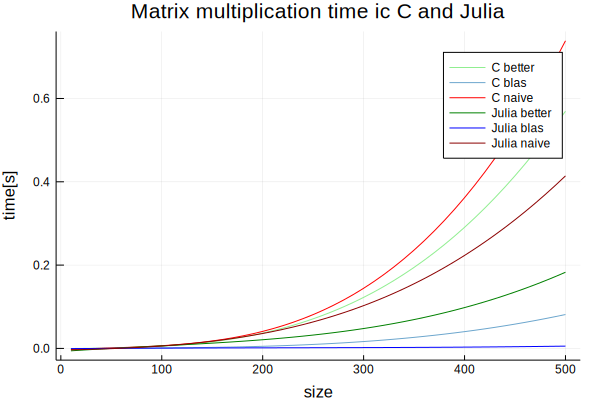

In [19]:
plot(dfPoly[:Size],dfPoly[:PolyVal], group=dfPoly[:Method],#yerr=dfData[:Std],
    xlabel="size",ylabel="time[s]",color = [:lightgreen :skyblue3 :red :green :blue :darkred],title="Matrix multiplication time ic C and Julia")